In this notebook I have done three things:
1. loaded the dataset 
2. Cleaned the dataset
3. Visulaized the data

In [39]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/netflix-shows/netflix_titles.csv


In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# **LOAD THE DATA**

In [41]:
#reading the data
nfDATA = pd.read_csv("/kaggle/input/netflix-shows/netflix_titles.csv")

In [42]:
#printing the data
nfDATA.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China","September 9, 2019",2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...
1,80117401,Movie,Jandino: Whatever it Takes,NaN,Jandino Asporaat,United Kingdom,"September 9, 2016",2016,TV-MA,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...
2,70234439,TV Show,Transformers Prime,NaN,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,"September 8, 2018",2013,TV-Y7-FV,1 Season,Kids' TV,"With the help of three human allies, the Autob..."
3,80058654,TV Show,Transformers: Robots in Disguise,NaN,"Will Friedle, Darren Criss, Constance Zimmer, ...",United States,"September 8, 2018",2016,TV-Y7,1 Season,Kids' TV,When a prison ship crash unleashes hundreds of...
4,80125979,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,"September 8, 2017",2017,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...


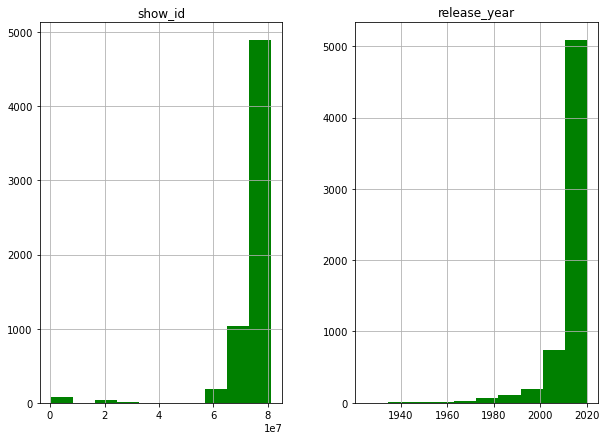

In [45]:
#visualizing the data
nfDATA.hist(figsize=(10,7), color = 'green')
plt.show()

In [46]:
#information about the data
nfDATA.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6234 entries, 0 to 6233
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       6234 non-null   int64 
 1   type          6234 non-null   object
 2   title         6234 non-null   object
 3   director      4265 non-null   object
 4   cast          5664 non-null   object
 5   country       5758 non-null   object
 6   date_added    6223 non-null   object
 7   release_year  6234 non-null   int64 
 8   rating        6224 non-null   object
 9   duration      6234 non-null   object
 10  listed_in     6234 non-null   object
 11  description   6234 non-null   object
dtypes: int64(2), object(10)
memory usage: 584.6+ KB


In [47]:
#number of rows and columns in the data
nfDATA.shape

(6234, 12)

In [48]:
#name of the columns in the dataset
nfDATA.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [49]:
#Description of the Data
nfDATA.describe().T

,count,mean,std,min,25%,50%,75%,max
show_id,6234.0,7.670368e+07,1.094296e+07,247747.0,80035801.75,80163367.0,80244888.75,81235729.0
release_year,6234.0,2.013359e+03,8.811620e+00,1925.0,2013.00,2016.0,2018.00,2020.0


# **LETS CLEAN THE DATA**

In [50]:
#cchecking is there is any null value or not
nfDATA.isnull().values.any()

True

In [51]:
#printing the null sum of null values in the dataset
nfDATA.isnull().sum()

show_id            0
type               0
title              0
director        1969
cast             570
country          476
date_added        11
release_year       0
rating            10
duration           0
listed_in          0
description        0
dtype: int64

*we have to clean the data because there are nul values in the 5 attributes*

In [52]:
#lets drop the columns having maximum null values 
nfDATA.drop(["director","cast"], axis=1, inplace=True)


In [53]:
#now lets print the data
nfDATA.head()

,show_id,type,title,country,date_added,release_year,rating,duration,listed_in,description
0,81145628,Movie,Norm of the North: King Sized Adventure,"United States, India, South Korea, China","September 9, 2019",2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...
1,80117401,Movie,Jandino: Whatever it Takes,United Kingdom,"September 9, 2016",2016,TV-MA,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...
2,70234439,TV Show,Transformers Prime,United States,"September 8, 2018",2013,TV-Y7-FV,1 Season,Kids' TV,"With the help of three human allies, the Autob..."
3,80058654,TV Show,Transformers: Robots in Disguise,United States,"September 8, 2018",2016,TV-Y7,1 Season,Kids' TV,When a prison ship crash unleashes hundreds of...
4,80125979,Movie,#realityhigh,United States,"September 8, 2017",2017,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...


*we have droped the two columns having maximum null values*

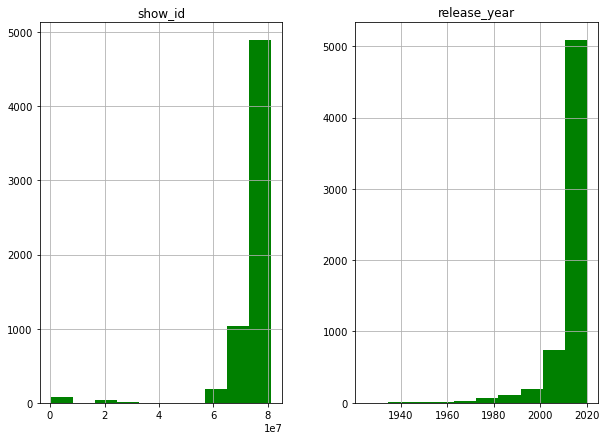

In [54]:
#now lets visulaize the data set
nfDATA.hist(figsize=(10,7), color = 'green')
plt.show()

*after droping two director and cast ,the country column has 476 null values. We also have to clean all these null values to make the model correct*

In [55]:
nfDATA.country.value_counts()

United States                                   2032
India                                            777
United Kingdom                                   348
Japan                                            176
Canada                                           141
                                                ... 
Spain, United Kingdom, United States               1
Italy, Turkey                                      1
Turkey, Azerbaijan                                 1
France, Canada, Belgium                            1
United States, France, United Kingdom, Japan       1
Name: country, Length: 554, dtype: int64

In [56]:
#Replacing null values with Unites States
nfDATA.country.replace(np.nan,"United States", inplace = True)

In [57]:
#now lets check the null values again
nfDATA.isnull().sum()

show_id          0
type             0
title            0
country          0
date_added      11
release_year     0
rating          10
duration         0
listed_in        0
description      0
dtype: int64

*now only two attributes/columns are left which have null values i.e. date_added and rating*

In [58]:
#details of date_added
nfDATA.date_added.value_counts()

January 1, 2020      122
November 1, 2019      94
March 1, 2018         78
December 31, 2019     74
October 1, 2018       72
                    ... 
June 2, 2016           1
August 28, 2017        1
 December 6, 2019      1
September 4, 2017      1
 May 4, 2018           1
Name: date_added, Length: 1524, dtype: int64

In [59]:
#replaced nan values with 'Not Date' and splited date_date
df = nfDATA[['date_added']].replace(np.nan,'Not Date')
df["release_month"] = df['date_added'].apply(lambda x: x.lstrip().split(" ")[0])
df.head()


,date_added,release_month
0,"September 9, 2019",September
1,"September 9, 2016",September
2,"September 8, 2018",September
3,"September 8, 2018",September
4,"September 8, 2017",September


In [60]:
#counts of realease months
df.release_month.value_counts()

December     696
October      646
November     612
January      610
March        551
August       509
September    479
July         474
April        447
May          428
June         393
February     378
Not           11
Name: release_month, dtype: int64

In [61]:
#replaced NOT with 0
df.release_month.replace("Not",0,inplace=True)
df.release_month.value_counts()

December     696
October      646
November     612
January      610
March        551
August       509
September    479
July         474
April        447
May          428
June         393
February     378
0             11
Name: release_month, dtype: int64

In [62]:
#In a new dataFrame df we will delete date_added column
df.drop("date_added",axis=1,inplace=True)
df

,release_month
0,September
1,September
2,September
3,September
4,September
...,...
6229,0
6230,0
6231,0
6232,0


In [63]:
#Lets check the null values
nfDATA.isnull().sum()

show_id          0
type             0
title            0
country          0
date_added      11
release_year     0
rating          10
duration         0
listed_in        0
description      0
dtype: int64

# **New Dataset**


In [64]:
new_data=pd.concat([nfDATA,df],axis=1)
new_data.head()

,show_id,type,title,country,date_added,release_year,rating,duration,listed_in,description,release_month
0,81145628,Movie,Norm of the North: King Sized Adventure,"United States, India, South Korea, China","September 9, 2019",2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...,September
1,80117401,Movie,Jandino: Whatever it Takes,United Kingdom,"September 9, 2016",2016,TV-MA,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...,September
2,70234439,TV Show,Transformers Prime,United States,"September 8, 2018",2013,TV-Y7-FV,1 Season,Kids' TV,"With the help of three human allies, the Autob...",September
3,80058654,TV Show,Transformers: Robots in Disguise,United States,"September 8, 2018",2016,TV-Y7,1 Season,Kids' TV,When a prison ship crash unleashes hundreds of...,September
4,80125979,Movie,#realityhigh,United States,"September 8, 2017",2017,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...,September


In [65]:
new_data.isnull().sum()

show_id           0
type              0
title             0
country           0
date_added       11
release_year      0
rating           10
duration          0
listed_in         0
description       0
release_month     0
dtype: int64

In [66]:
new_data.drop("date_added", axis = 1, inplace = True)
new_data.head()

,show_id,type,title,country,release_year,rating,duration,listed_in,description,release_month
0,81145628,Movie,Norm of the North: King Sized Adventure,"United States, India, South Korea, China",2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...,September
1,80117401,Movie,Jandino: Whatever it Takes,United Kingdom,2016,TV-MA,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...,September
2,70234439,TV Show,Transformers Prime,United States,2013,TV-Y7-FV,1 Season,Kids' TV,"With the help of three human allies, the Autob...",September
3,80058654,TV Show,Transformers: Robots in Disguise,United States,2016,TV-Y7,1 Season,Kids' TV,When a prison ship crash unleashes hundreds of...,September
4,80125979,Movie,#realityhigh,United States,2017,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...,September


In [67]:
new_data.isnull().sum()

show_id           0
type              0
title             0
country           0
release_year      0
rating           10
duration          0
listed_in         0
description       0
release_month     0
dtype: int64

In [68]:
#counting of Rating
new_data.rating.value_counts()

TV-MA       2027
TV-14       1698
TV-PG        701
R            508
PG-13        286
NR           218
PG           184
TV-Y7        169
TV-G         149
TV-Y         143
TV-Y7-FV      95
G             37
UR             7
NC-17          2
Name: rating, dtype: int64

In [69]:
new_data.rating.replace(np.nan,"TV-MA",inplace=True)
new_data.isnull().sum()  #after replacing printing the null values in new dataset

show_id          0
type             0
title            0
country          0
release_year     0
rating           0
duration         0
listed_in        0
description      0
release_month    0
dtype: int64

# NOW THE DATASET IS CLEAN, LETS PROCESS THE DATA TO VISUALIZE

In [70]:
#printing the dataset
new_data.head()

,show_id,type,title,country,release_year,rating,duration,listed_in,description,release_month
0,81145628,Movie,Norm of the North: King Sized Adventure,"United States, India, South Korea, China",2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...,September
1,80117401,Movie,Jandino: Whatever it Takes,United Kingdom,2016,TV-MA,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...,September
2,70234439,TV Show,Transformers Prime,United States,2013,TV-Y7-FV,1 Season,Kids' TV,"With the help of three human allies, the Autob...",September
3,80058654,TV Show,Transformers: Robots in Disguise,United States,2016,TV-Y7,1 Season,Kids' TV,When a prison ship crash unleashes hundreds of...,September
4,80125979,Movie,#realityhigh,United States,2017,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...,September


Movie      4265
TV Show    1969
Name: type, dtype: int64

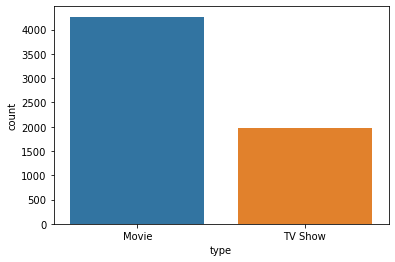

In [71]:
#visualizing the new_data 
sns.countplot(x="type",data=new_data)
new_data.type.value_counts()

## 4265 Movies and 1969 Tv Show

Ploting dataset with respect to the countries

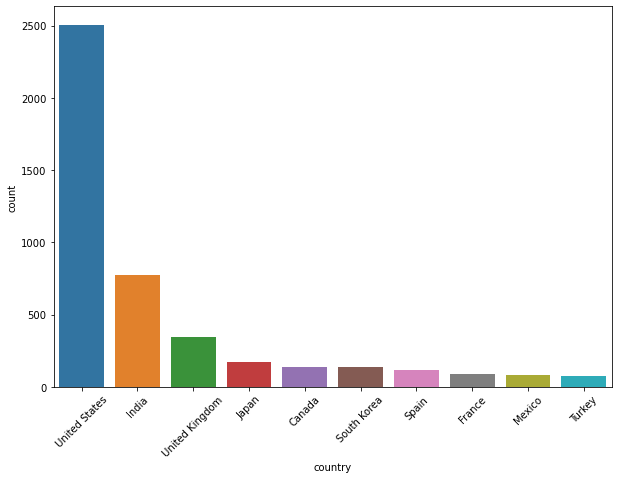

In [72]:
plt.figure(figsize=(10,7))
sns.countplot(x=new_data.country,order=new_data.country.value_counts().index[0:10]);
plt.xticks(rotation=45)
plt.show()

Plotting data with respect to the Release year.

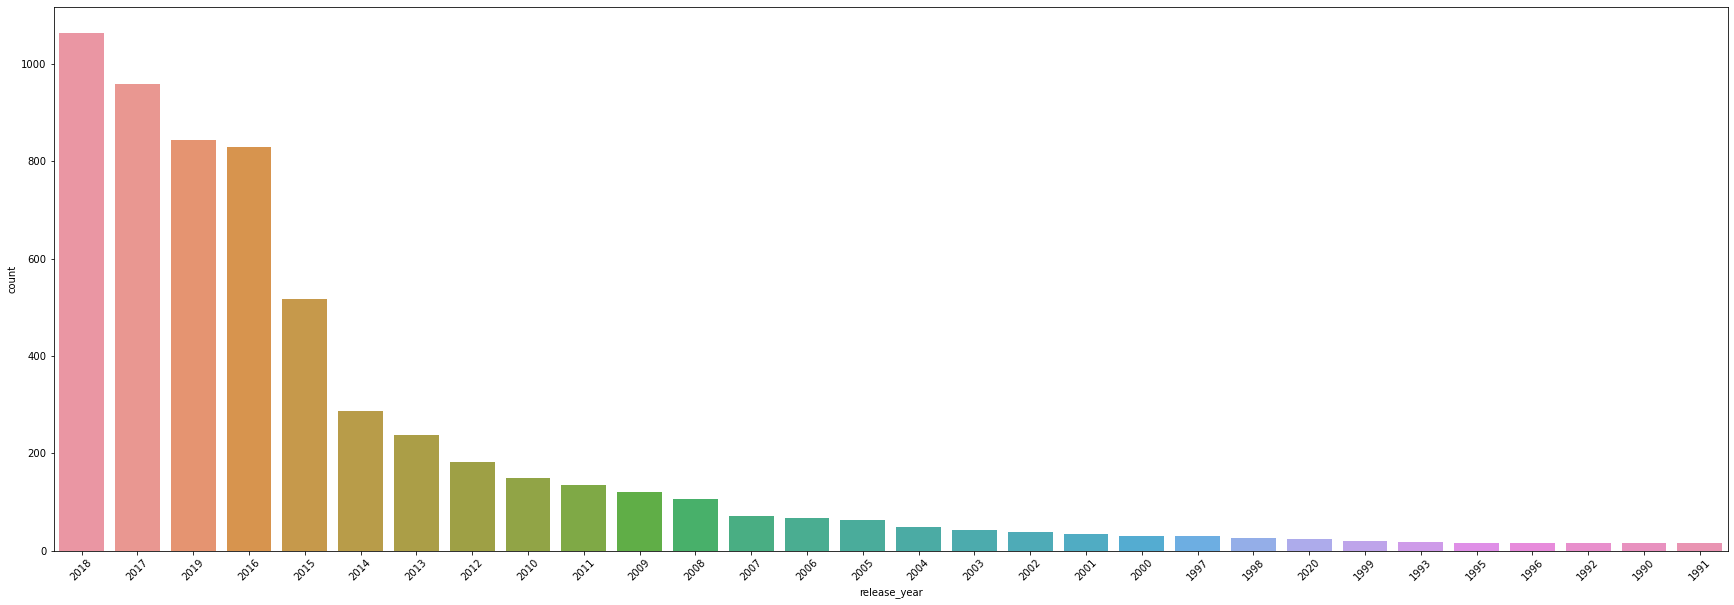

In [73]:
plt.figure(figsize=(30,10))
sns.countplot(x=new_data.release_year,order=new_data.release_year.value_counts().index[0:30]);
plt.xticks(rotation=45)
plt.show()

Ploting data with respect to Ratings

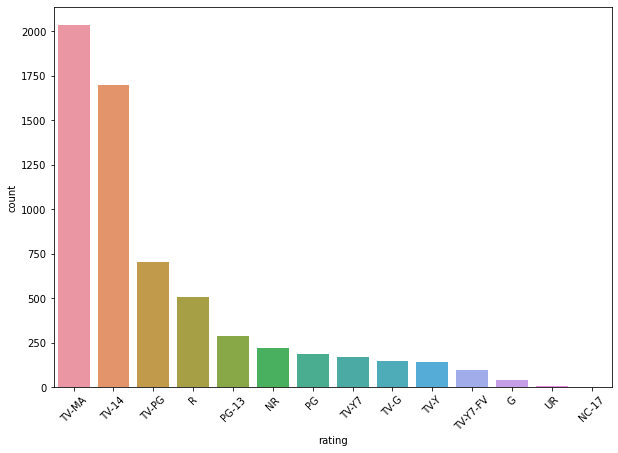

In [74]:
plt.figure(figsize=(10,7))
sns.countplot(x=new_data.rating,order=new_data.rating.value_counts().index[0:20]);
plt.xticks(rotation=45)
plt.show()



Ploting data with respect to the release month

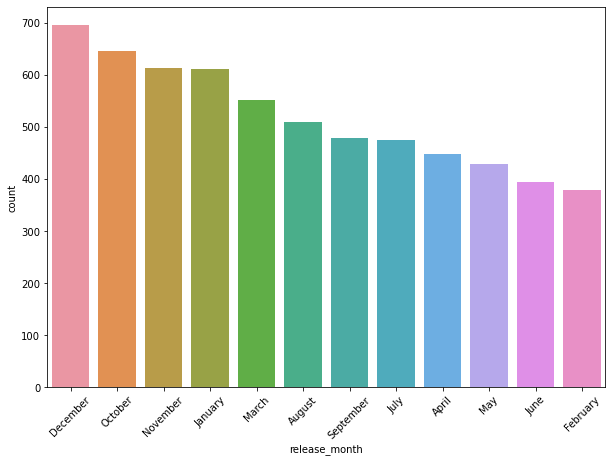

In [75]:
plt.figure(figsize=(10,7))
sns.countplot(x=new_data.release_month,order=new_data.release_month.value_counts().index[0:12]);
plt.xticks(rotation=45)
plt.show()



Ploting data (Moves(blue), Tv shows(pastel)) with respect to the countries

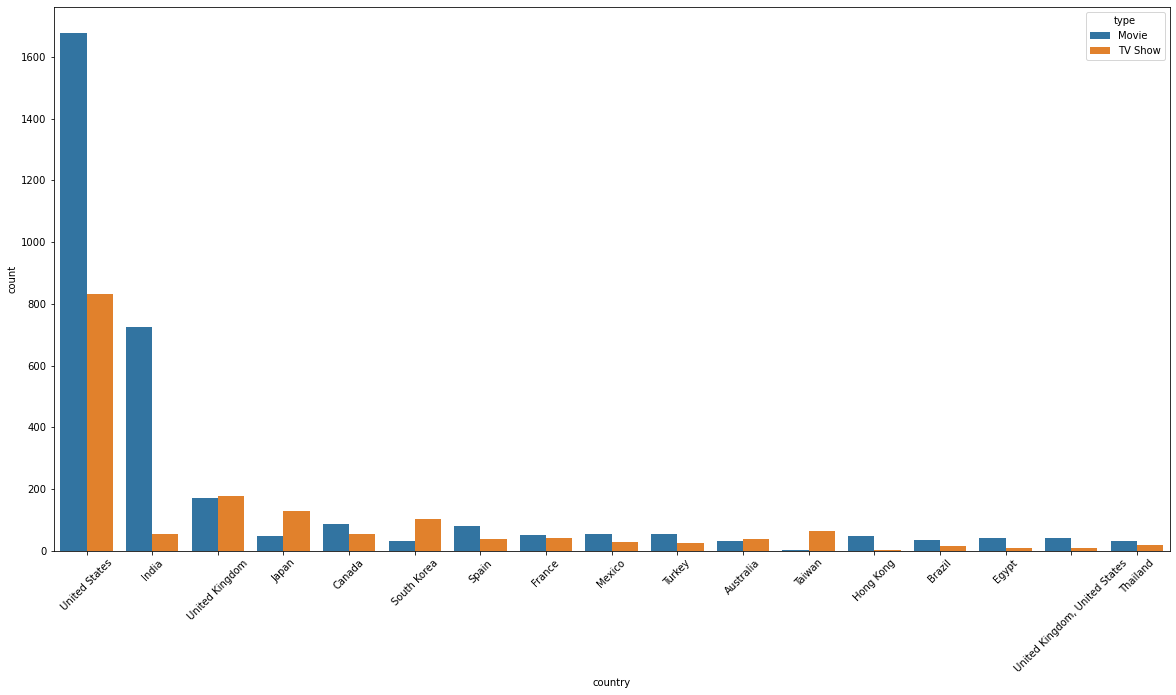

In [76]:
plt.figure(figsize=(20,10))
sns.countplot(x=new_data.country,hue= new_data.type,order = new_data['country'].value_counts().index[0:17])
plt.xticks(rotation=45)
plt.show()



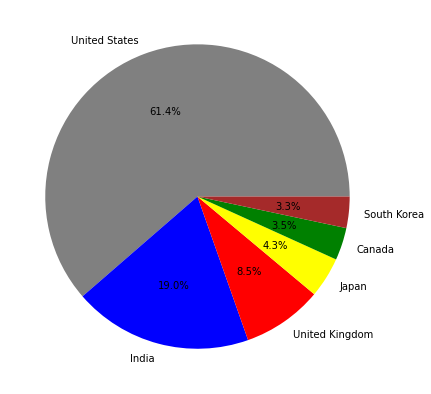

In [77]:
labels = new_data.country.value_counts()[0:6].index
colors = ['grey','blue','red','yellow','green','brown']
explode = [0,0,0,0,0,0]
sizes = new_data.country.value_counts()[0:6].values

# visual
plt.figure(figsize = (7,7))
plt.pie(sizes, explode=explode, labels=labels, colors=colors,autopct='%1.1f%%')
plt.show()

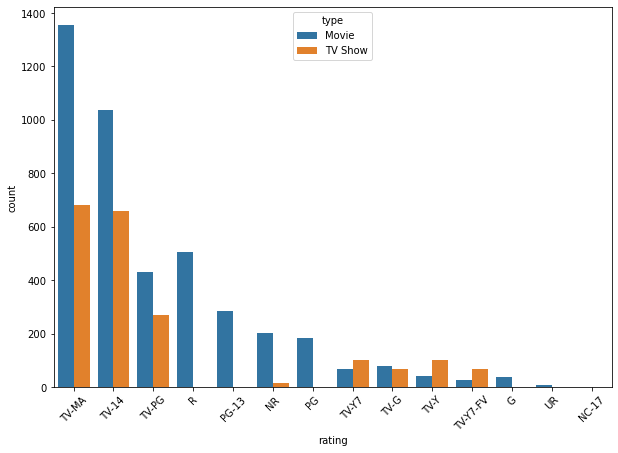

In [78]:
plt.figure(figsize=(10,7))
sns.countplot(x=new_data.rating,hue=new_data.type,order=new_data.rating.value_counts().index[0:20]);
plt.xticks(rotation=45)
plt.show()